In [1]:
import numpy as np
import pickle
import gzip
import random
import matplotlib.pyplot as plt



def relu(x):
    return np.maximum(x, 0)

def relu_prime(drelu, dx):
    drelu[dx < 0] = 0
    return drelu

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))


def load_data():
    f = gzip.open('./data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros([10])
    e[j] = 1.0
    return e

def format_data(data):
    td = []
    for t in range(len(data[0])):
        td.append([np.reshape(data[0][t], (1,784)),np.reshape(vectorized_result(data[1][t]), (1,10))])
    return td

class network():
    def __init__(self, width, sizes, epochs):
        self.width = width
        self.sizes = sizes
        self.learning_rate = 3
        self.weights = []
        self.biases = []
        self.gradients = []
        self.minibatch_size = 10
        self.epochs = epochs
        for size in sizes:
            self.weights.append(np.random.randn(width, size))
            self.gradients.append(np.zeros([width, size]))
            width = size
        self.zs = []
        self.activations = []
                


    def fprop(self, x):
        z = x
        self.activations = []
        self.zs = []
        for layer in range(len(self.weights)):
            self.activations.append(z)
            z = z.dot(self.weights[layer])
            self.zs.append(z)
            z = sigmoid(z)
        self.activations.append(z)
        return z

    def bprop(self, y):
        delta_gradients = []
        grad = 2.0 * (self.activations[-1] - y)
        cost = 1000*np.sum(np.square((self.activations[-1] - y)))
        for layer in range(1, 1+len(self.weights)):
            delta = grad*sigmoid_prime(self.zs[-layer])
            grad_w = self.activations[-layer-1].T.dot(delta)
            delta_gradients.append(grad_w)
            grad = delta.dot(self.weights[-layer].T)
        delta_gradients.reverse()
        self.gradients = [nb+dnb for nb, dnb in zip(self.gradients, delta_gradients)]
        return cost


    def update(self):
        for layer in range(len(self.weights)):
            self.weights[layer] -= self.learning_rate*self.gradients[layer]/self.minibatch_size
        width = self.width
        self.gradients = []
        for size in self.sizes:
            self.gradients.append(np.zeros([width, size]))
            width = size

    def evaluate(self, test_data):
        passed = 0
        for test in range(len(test_data[0])):
            class_pred = n.fprop(np.reshape(test_data[0][test], (1,784)))
            if (class_pred.argmax() == test_data[1][test]):
                passed+=1
        print ('eval: ', passed, '/', len(test_data[0]), '=', passed/len(test_data[0]))
        

In [2]:
image_size = 784
class_size = 10
training_data, validation_data, test_data = load_data()
td = format_data(training_data)
n = network(image_size, [40,30,class_size], 5)
bookmark = 0
losses = []
cost = []
batchcost = []

for epoch in range(n.epochs):
    random.shuffle(td)
    batchcost = []
    for minibatch in range(int(len(td)/n.minibatch_size)):
        cost = []
        for t in range(n.minibatch_size):
            class_pred = n.fprop(td[bookmark + t][0])
            class_actual = td[bookmark + t][1]
            cost.append(n.bprop(class_actual))
        n.update()
        batchcost.append(np.mean(cost))
        #print (bookmark, '/', len(td), np.mean(cost))
        bookmark += n.minibatch_size
    print("epoch ", epoch, ": ", n.evaluate(test_data), np.mean(batchcost))
    losses.append(np.mean(batchcost))
    bookmark = 0

eval:  9154 / 10000 = 0.9154
epoch  0 :  None 249.33042638659674
eval:  9144 / 10000 = 0.9144
epoch  1 :  None 138.52927865624335
eval:  9323 / 10000 = 0.9323
epoch  2 :  None 119.18864673312935
eval:  9304 / 10000 = 0.9304
epoch  3 :  None 110.29881133184107
eval:  9400 / 10000 = 0.94
epoch  4 :  None 103.7324469782727


No handles with labels found to put in legend.


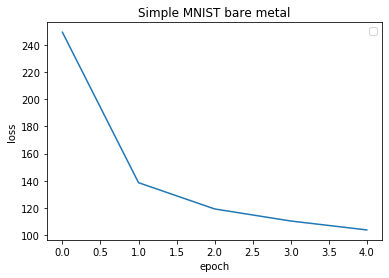

In [6]:

ax = plt.subplot(111)   
    
plt.plot(losses)
    

plt.title('Simple MNIST bare metal')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()